# Data exploration

This notebook is used to explore the data and to get a better understanding of it. Those data have the format of csv file. They come from the UNIL's survey. We concentrate on the data of one mouse the 
06705 from the bxd_067 breed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append('../Library')
import dataProcessing as dp

In [43]:
# mouse = '03204'
#mouse = '04405'
#data_folder = '/home/magali.egger/shared-projects/mice_UNIL/BXD envoie/CSV_files/'
#data_path = data_folder + mouse + '.smo.csv'
#df = pd.read_csv(data_path, sep=',', header=0)

In [2]:
with open('/home/magali.egger/shared-projects/mice_UNIL/Data/df_simplify_labels.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

Unnamed: 0 rawState state          EEGv          EMGv epoch  day  \
0          99        n     n  7.116438e-09  2.315795e-10    99    0   
1         100        n     n  6.789003e-09  1.883032e-10   100    0   
2         101        n     n  5.345885e-09  1.965400e-10   101    0   
3         102        n     n  8.861552e-09  1.982735e-10   102    0   
4         103        n     n  6.617297e-09  2.121310e-10   103    0   

   spectral_flatness  spectral_centroid  spectral_entropy  ...   EEGv_log  \
0           0.054175           9.400168         -5.994889  ... -18.760859   
1           0.075867           9.576805         -5.910677  ... -18.807962   
2           0.082830          10.181243         -5.931538  ... -19.046939   
3           0.052586           7.561301         -5.506340  ... -18.541544   
4           0.068133           8.691670         -5.728127  ... -18.833579   

    EMGv_log  bias        EEGv^2        EEGv^3        EMGv^2        EMGv^3  \
0 -22.186098     1  5.064369e-17  3.604026e-25  5.362906e-20  1.241939e-29   
1 -22.392967     1  4.609056e-17  3.129089e-25  3.545811e-20  6.676878e-30   
2 -22.350155     1  2.857849e-17  1.527773e-25  3.862797e-20  7.591942e-30   
3 -22.341374     1  7.852710e-17  6.958720e-25  3.931238e-20  7.794603e-30   
4 -22.273817     1  4.378862e-17  2.897624e-25  4.499956e-20  9.545802e-30   

   mouse    breed  label  
0  09003  bxd_090      n  
1  09003  bxd_090      n  
2  09003  bxd_090      n  
3  09003  bxd_090      n  
4  09003  bxd_090      n  

[5 rows x 89 columns]

In [46]:
df.describe()

Unnamed: 0          EEGv          EMGv           day  \
count  3.382420e+06  3.382420e+06  3.382420e+06  3.382420e+06   
mean   4.323189e+04  3.071368e-08  7.507534e-07  1.499949e+00   
std    2.490996e+04  5.863624e-07  4.575800e-06  1.117628e+00   
min    9.900000e+01  6.552687e-10  1.385080e-11  0.000000e+00   
25%    2.164000e+04  3.161818e-09  1.062050e-10  1.000000e+00   
50%    4.315400e+04  4.326497e-09  3.378520e-10  1.000000e+00   
75%    6.480100e+04  6.351876e-09  1.275990e-09  3.000000e+00   
max    8.639900e+04  3.905248e-05  4.989843e-05  3.000000e+00   

       spectral_flatness  spectral_centroid  spectral_entropy  \
count       3.382420e+06       3.382420e+06      3.382420e+06   
mean        8.493948e-02       1.042793e+01     -5.798227e+00   
std         6.490474e-02       5.156470e+00      7.458865e-01   
min         4.632736e-06       4.875814e-02     -8.566827e+00   
25%         4.676342e-02       7.807938e+00     -6.193740e+00   
50%         7.198338e-02       9.544253e+00     -5.871485e+00   
75%         1.086172e-01       1.215353e+01     -5.547010e+00   
max         9.125530e-01       9.141486e+01     -5.459544e-01   

       spectral_rolloff_0.1  spectral_rolloff_0.2  spectral_rolloff_0.3  ...  \
count          3.382420e+06          3.382420e+06          3.382420e+06  ...   
mean           1.454939e+00          2.500230e+00          3.555053e+00  ...   
std            1.592411e+00          2.643107e+00          3.539255e+00  ...   
min            0.000000e+00          0.000000e+00          0.000000e+00  ...   
25%            5.000000e-01          1.500000e+00          2.250000e+00  ...   
50%            1.500000e+00          2.500000e+00          3.250000e+00  ...   
75%            2.000000e+00          3.250000e+00          4.250000e+00  ...   
max            7.350000e+01          9.975000e+01          1.000000e+02  ...   

        EMGv_min100   EEGv_max100   EMGv_max100      EEGv_log      EMGv_log  \
count  3.382420e+06  3.382420e+06  3.382420e+06  3.382420e+06  3.382420e+06   
mean   3.917615e-07  9.415016e-07  1.673483e-06 -1.916923e+01 -2.140836e+01   
std    2.723950e-06  4.895407e-06  8.074986e-06  7.687021e-01  2.394260e+00   
min    9.177240e-12  1.629018e-09  3.673540e-11 -2.114598e+01 -2.500268e+01   
25%    4.703028e-11  8.135230e-09  1.548700e-09 -1.957212e+01 -2.296565e+01   
50%    9.628165e-11  1.215339e-08  4.212371e-09 -1.925851e+01 -2.180841e+01   
75%    2.177042e-10  1.969667e-08  1.112104e-08 -1.887452e+01 -2.047954e+01   
max    3.411630e-05  6.051660e-05  6.051360e-05 -1.015060e+01 -9.905521e+00   

            bias        EEGv^2        EEGv^3        EMGv^2        EMGv^3  
count  3382420.0  3.382420e+06  3.382420e+06  3.382420e+06  3.382420e+06  
mean         1.0  3.447641e-13  7.656055e-18  2.150157e-11  6.473061e-16  
std          0.0  1.429357e-11  4.310714e-16  1.407371e-10  4.678923e-15  
min          1.0  4.293771e-19  2.813574e-28  1.918447e-22  2.657202e-33  
25%          1.0  9.997090e-18  3.160897e-26  1.127950e-20  1.197939e-30  
50%          1.0  1.871858e-17  8.098589e-26  1.141440e-19  3.856377e-29  
75%          1.0  4.034633e-17  2.562749e-25  1.628151e-18  2.077504e-27  
max          1.0  1.525096e-09  5.955877e-14  2.489853e-09  1.242397e-13  

[8 rows x 83 columns]

In [47]:
print("Presence of NA values :" ,df.isnull().values.any())

Presence of NA values : False


#### Exploration of the different states of sleep of the mouse

In [4]:
df = df[df['mouse'] == '10102']

In [5]:
mouse = '10102'

In [6]:
df['label'].value_counts()

w    33818
n    31509
1    15449
r     3530
5      118
3      101
2       54
4        1
6        1
Name: label, dtype: int64

In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
df.index

RangeIndex(start=0, stop=84581, step=1)

In [9]:
# create a data frame df1 containing only the data of the last hour of the first day
df['seconds'] = df.index * 4
df['minutes'] = df['seconds'] // 60
df['hours'] = df['minutes'] // 60

In [10]:
df['hours'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93])

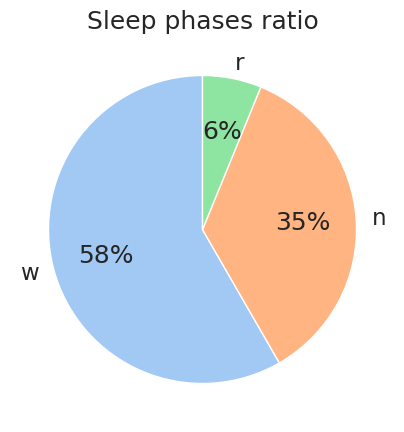

In [12]:
sleep_phases = df['state'].value_counts()
total_sleep_phases = sleep_phases.sum()
sleep_phases_ratio = sleep_phases / total_sleep_phases

# plot the pie chart with seaborn
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie(sleep_phases_ratio, labels=sleep_phases_ratio.index, autopct='%1.0f%%', startangle=90, pctdistance=0.65)
plt.title('Sleep phases ratio')
plt.show()

In [11]:
# sleep phase ratio per day
df_day0 = df[df['day'] == 0]
df_day1 = df[df['day'] == 1]
df_day2 = df[df['day'] == 2]
df_day3 = df[df['day'] == 3]

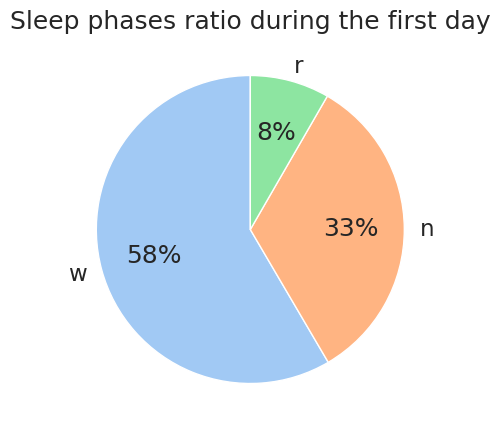

In [14]:
# plot the pie chart with seaborn for day 0
sleep_phases_day0 = df_day0['state'].value_counts()
total_sleep_phases_day0 = sleep_phases_day0.sum()
sleep_phases_ratio_day0 = sleep_phases_day0 / total_sleep_phases_day0

plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie(sleep_phases_ratio_day0, labels=sleep_phases_ratio_day0.index, autopct='%1.0f%%', startangle=90, pctdistance=0.65)
plt.title('Sleep phases ratio during the first day')
plt.show()

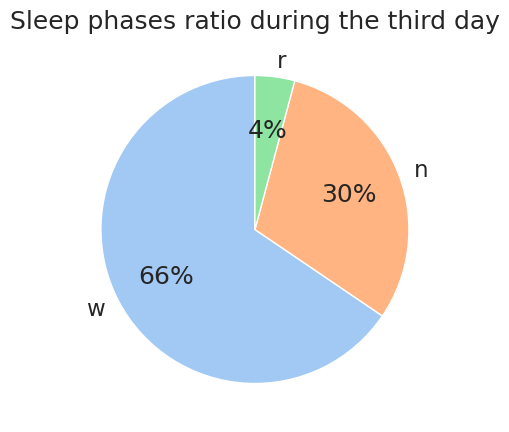

In [15]:
# plot the pie chart with seaborn for day 2
sleep_phases_day2 = df_day2['state'].value_counts()
total_sleep_phases_day2 = sleep_phases_day2.sum()
sleep_phases_ratio_day2 = sleep_phases_day2 / total_sleep_phases_day2

plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie(sleep_phases_ratio_day2, labels=sleep_phases_ratio_day2.index, autopct='%1.0f%%', startangle=90, pctdistance=0.65)
plt.title('Sleep phases ratio during the third day')
plt.show()

In [12]:
# compute the ratio for each sleep phase
ratio_wake = sleep_phases_ratio_day2['w']
ratio_nrem = sleep_phases_ratio_day2['n']
print("Ratio wake : ", ratio_wake)
print("Ratio NREM : ", ratio_nrem)

NameError: name 'sleep_phases_ratio_day2' is not defined

In [13]:
df['converted'] = df['label']
# convert the labels to n, r, w
df['converted'] = df['converted'].replace(['1', '4', '9'], 'w')
df['converted'] = df['converted'].replace(['2', '5'], 'n')
df['converted'] = df['converted'].replace(['3', '6'], 'r')

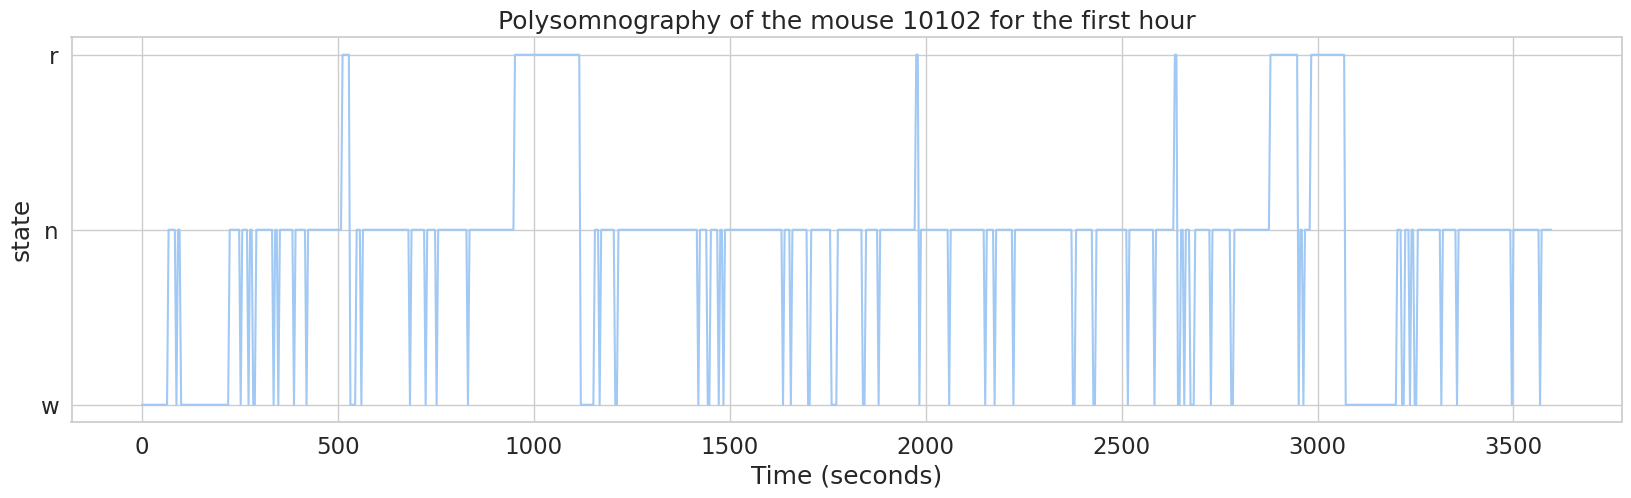

In [91]:
df1 = df[df['seconds'] < 3600]
plt.figure(figsize=(20,5))
plt.plot(df1['seconds'], df1['converted'])
plt.title('Polysomnography of the mouse ' + mouse + ' for the first hour')
plt.xlabel('Time (seconds)')
plt.ylabel('state')
plt.show()

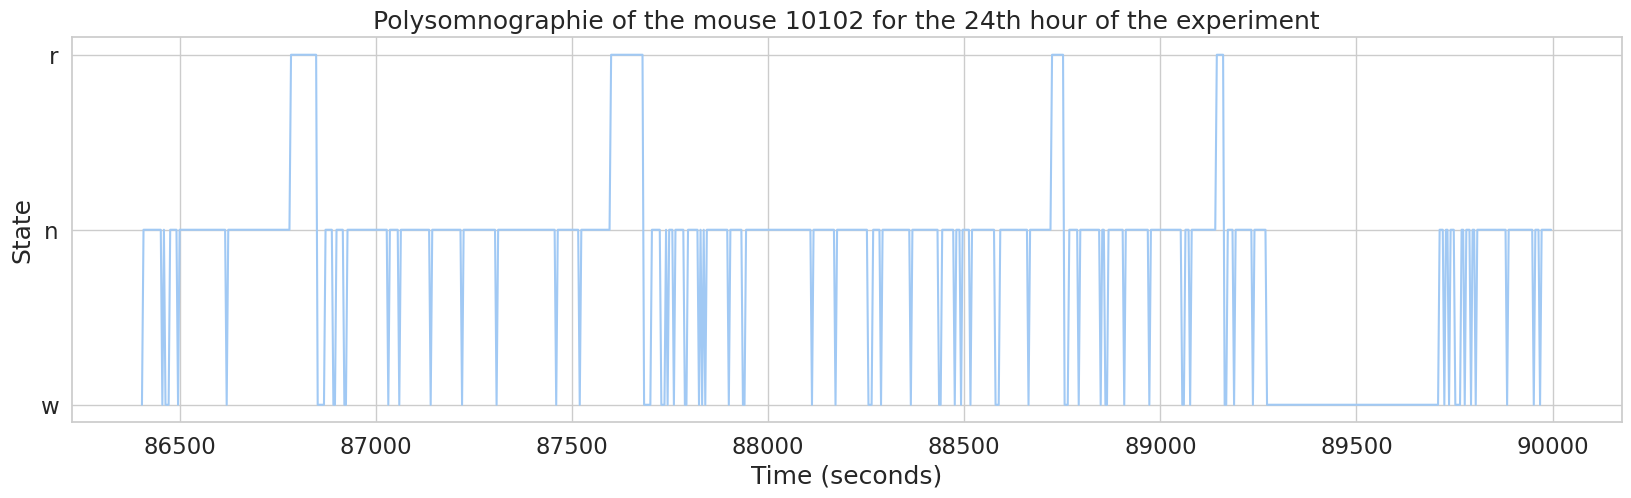

In [92]:
df2 = df[(df['seconds'] > 86400) & (df['seconds'] < 90000) ]
plt.figure(figsize=(20,5))
plt.plot(df2['seconds'], df2['converted'])
plt.title('Polysomnographie of the mouse ' + mouse + ' for the 24th hour of the experiment')
plt.xlabel('Time (seconds)')
plt.ylabel('State')
plt.show()

In [37]:
#display the df2['state'] for the minute 1430 to 1445
df356 = df2[df2['minutes'] >= 1435]
df356 = df356[df356['minutes'] <= 1450]

df356['state'].unique()

array(['w', 'n'], dtype=object)

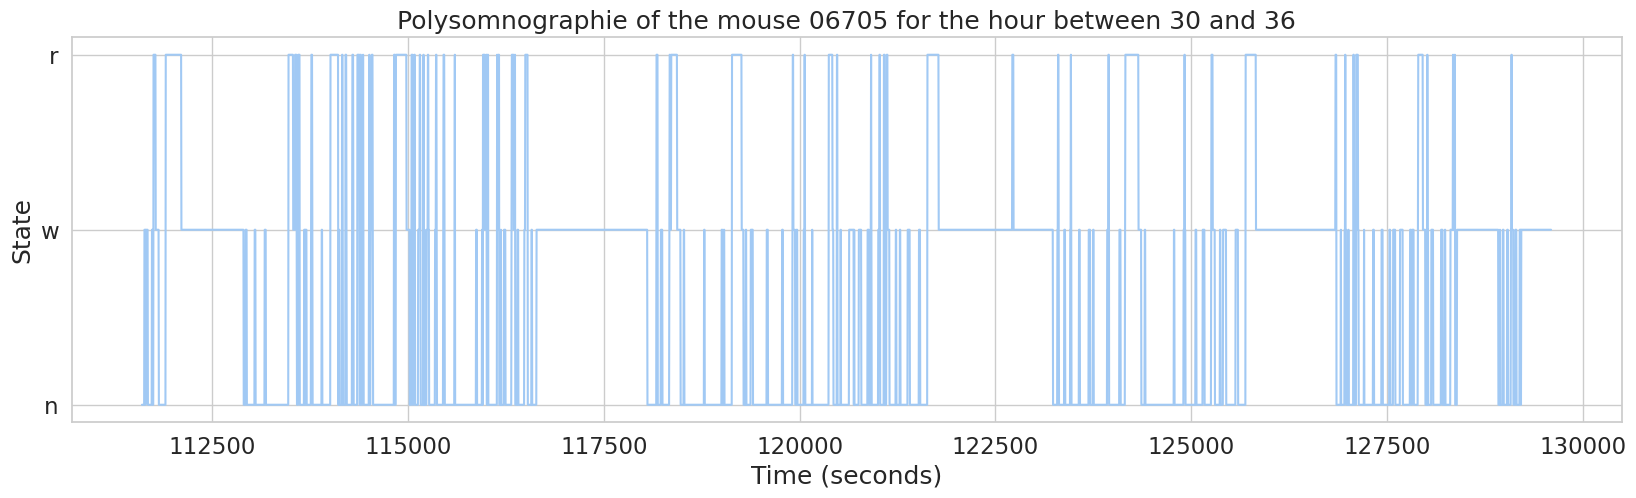

In [38]:
df3 = df[(df['hours'] > 30) & (df['hours'] < 36)]

plt.figure(figsize=(20,5))
plt.plot(df3['seconds'], df3['state'])
plt.title('Polysomnographie of the mouse ' + mouse + ' for the hour between 30 and 36')
plt.xlabel('Time (seconds)')
plt.ylabel('State')
plt.show()

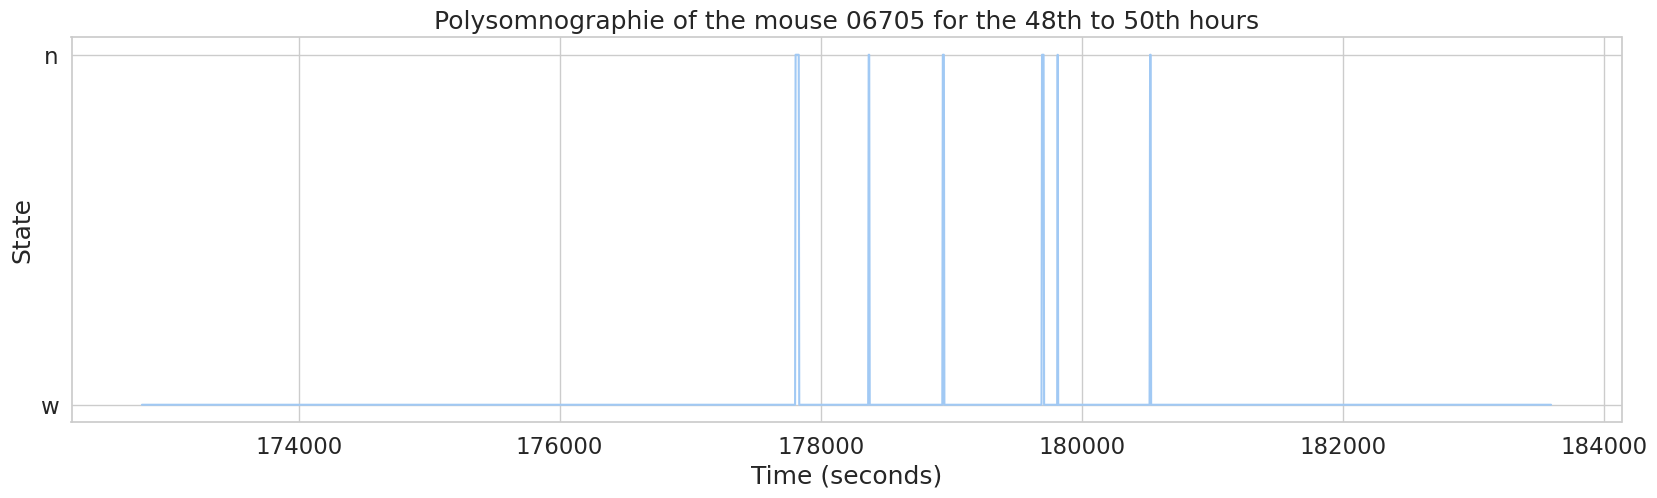

In [39]:
df4 = df[(df['hours'] >= 48) & (df['hours'] <= 50)]


plt.figure(figsize=(20,5))
plt.plot(df4['seconds'], df4['state'])
plt.title('Polysomnographie of the mouse ' + mouse + ' for the 48th to 50th hours')
plt.xlabel('Time (seconds)')
plt.ylabel('State')
plt.show()

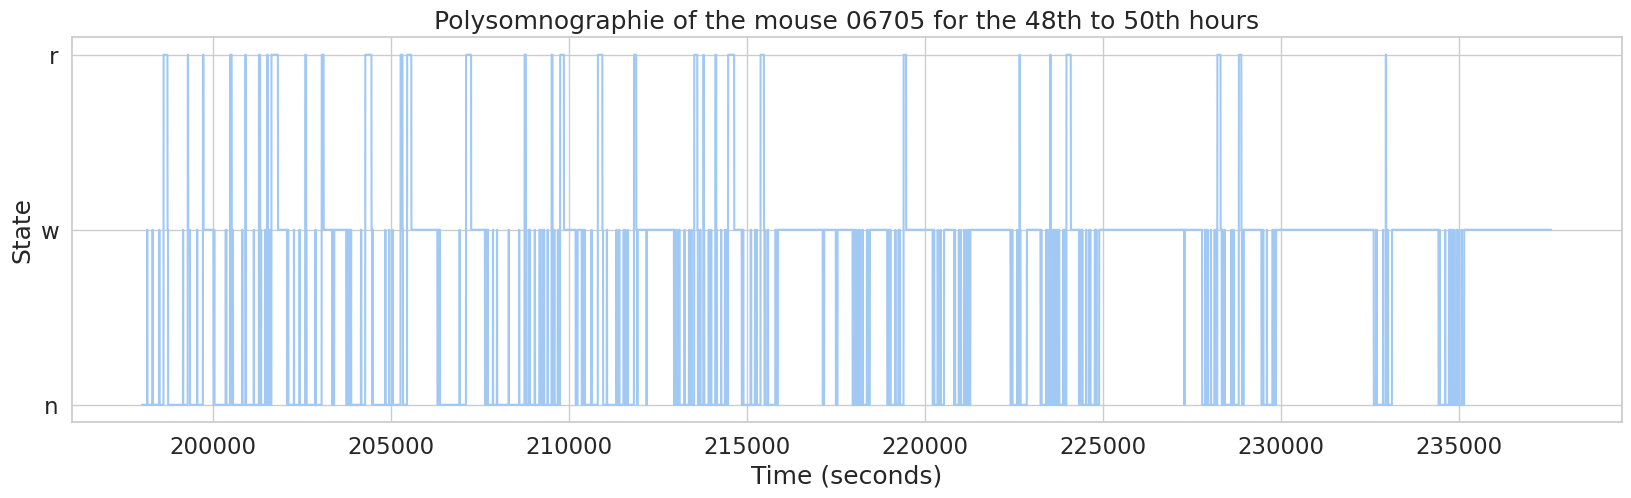

In [40]:
df5 = df[(df['hours'] >= 55) & (df['hours'] <= 65)]


plt.figure(figsize=(20,5))
plt.plot(df5['seconds'], df5['state'])
plt.title('Polysomnographie of the mouse ' + mouse + ' for the 48th to 50th hours')
plt.xlabel('Time (seconds)')
plt.ylabel('State')
plt.show()

Does this mouse slept less during the third night (day of the perturbation)

In [93]:
nb_sleep_day0 = df[(df['hours'] >= 0) & (df['hours'] < 24) & (df['state'] != 'w')].shape[0]
nb_sleep_day1 = df[(df['hours'] >= 24) & (df['hours'] < 48) & (df['state'] != 'w')].shape[0]
nb_sleep_day2 = df[(df['hours'] >= 48) & (df['hours'] < 72) & (df['state'] != 'w')].shape[0]
nb_sleep_day3 = df[(df['hours'] >= 72) & (df['hours'] < 96) & (df['state'] != 'w')].shape[0]

print("Number of sleep in the first day :", nb_sleep_day0)
print("Number of sleep in the second day :", nb_sleep_day1)
print("Number of sleep in the third day :", nb_sleep_day2)
print("Number of sleep in the fourth day :", nb_sleep_day3)

Number of sleep in the first day : 8767
Number of sleep in the second day : 9265
Number of sleep in the third day : 7856
Number of sleep in the fourth day : 9364


Display the variance of the EMG signal during the different states of sleep

Study the EMGv 

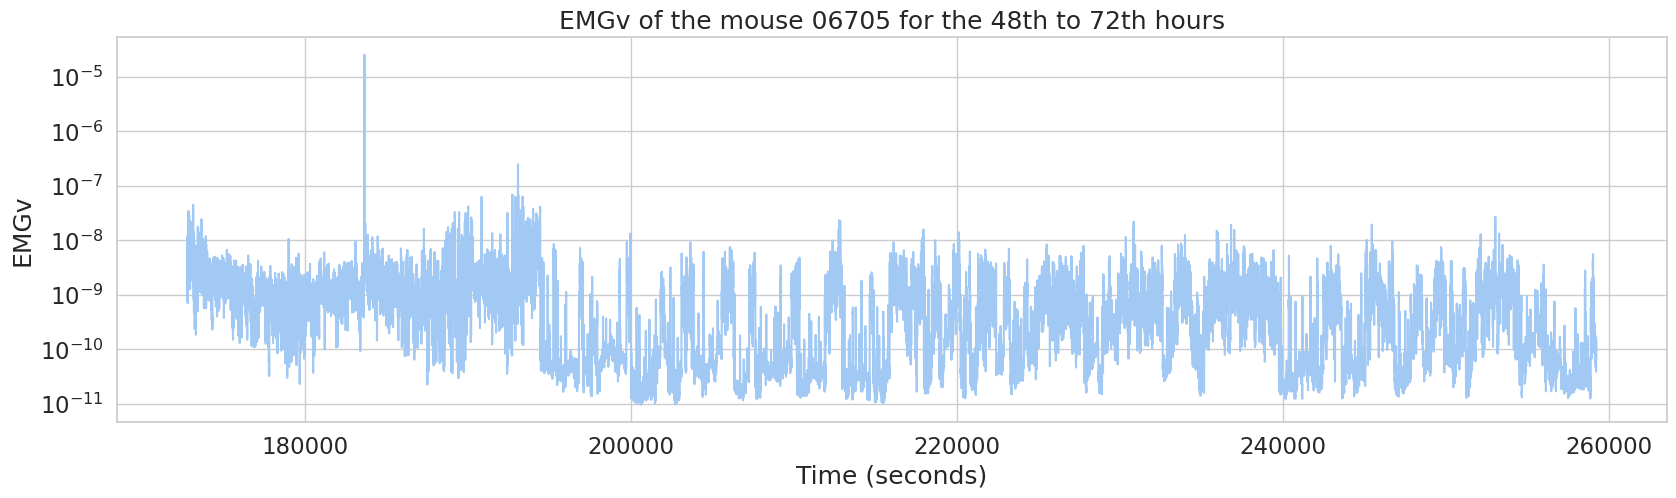

In [42]:
# plot the EMGv for each data of the third day
df6 = df[(df['hours'] >= 48) & (df['hours'] < 72)]
plt.figure(figsize=(20,5))
plt.plot(df6['seconds'], df6['EMGv'])
plt.title('EMGv of the mouse ' + mouse + ' for the 48th to 72th hours')
plt.xlabel('Time (seconds)')
plt.ylabel('EMGv')
plt.yscale('log')
plt.show()

/tmp/ipykernel_2415159/311005948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['state'] = df6['state'].replace(['w', 'n', 'r'], [0, 1, 2])


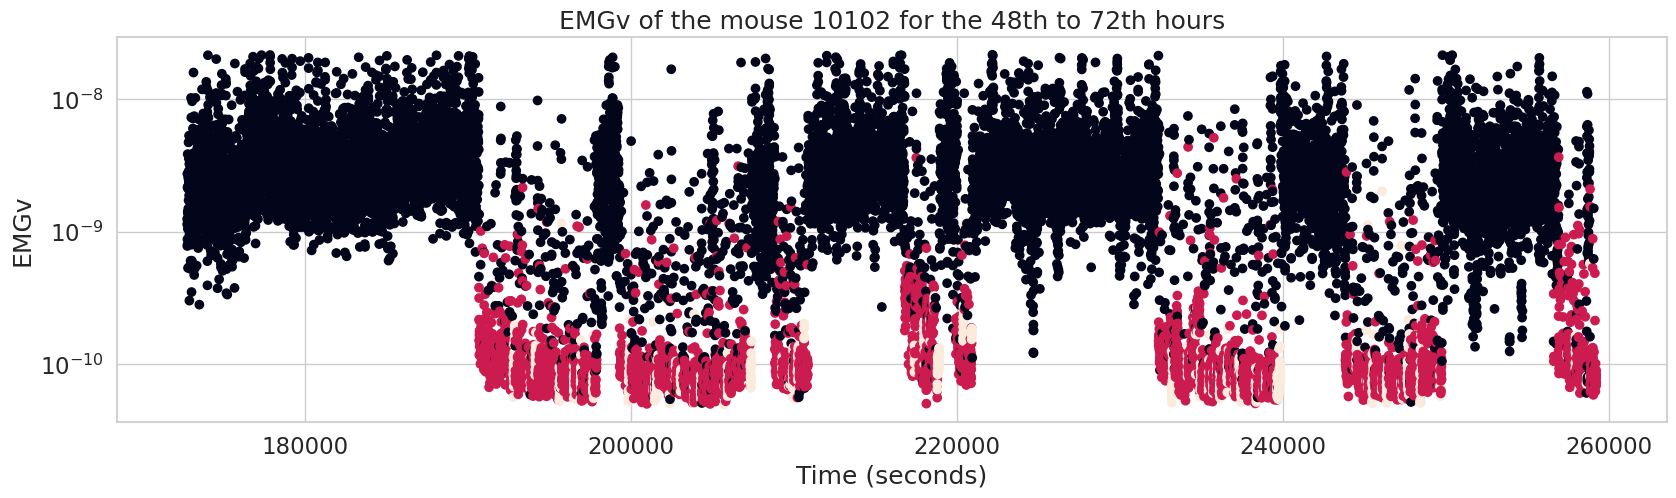

In [100]:
df6 = df[(df['hours'] >= 48) & (df['hours'] < 72)]
df6['state'] = df6['state'].replace(['w', 'n', 'r'], [0, 1, 2])
plt.figure(figsize=(20,5))
plt.scatter(df6['seconds'], df6['EMGv'], c=df6['state'])
plt.title('EMGv of the mouse ' + mouse + ' for the 48th to 72th hours')
plt.xlabel('Time (seconds)')
plt.ylabel('EMGv')
plt.yscale('log')
plt.show()

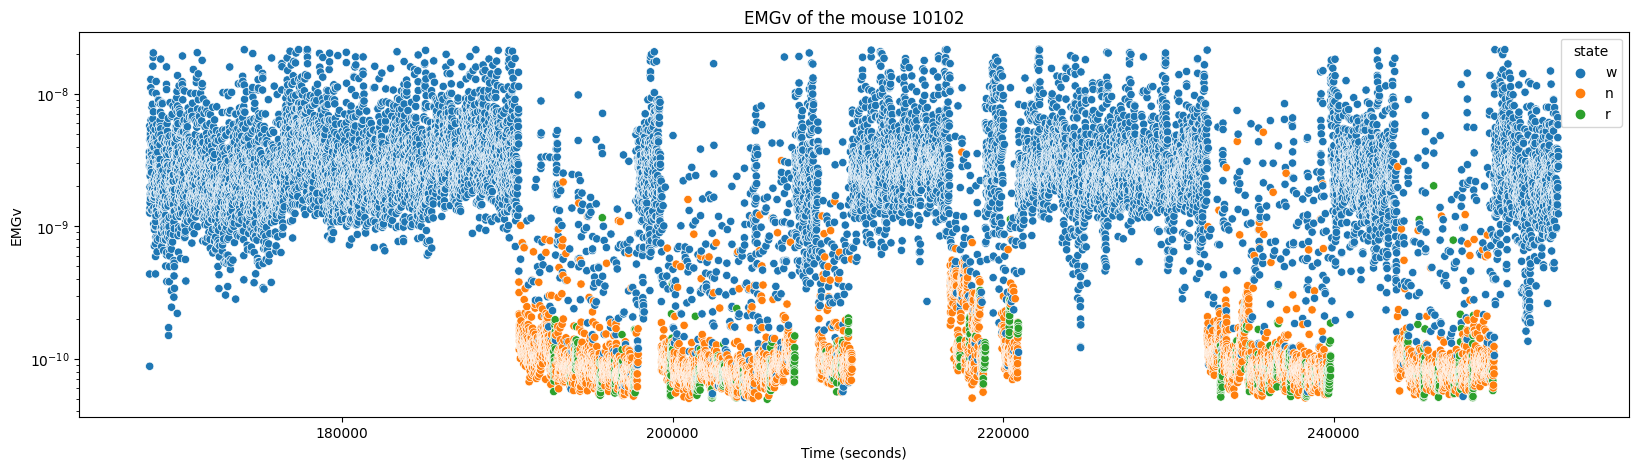

In [14]:

plt.figure(figsize=(20,5))
sns.scatterplot(x='seconds', y='EMGv', hue='state', data=df_day2)
plt.title('EMGv of the mouse ' + mouse)
plt.xlabel('Time (seconds)')
plt.ylabel('EMGv')
plt.yscale('log')
plt.show()

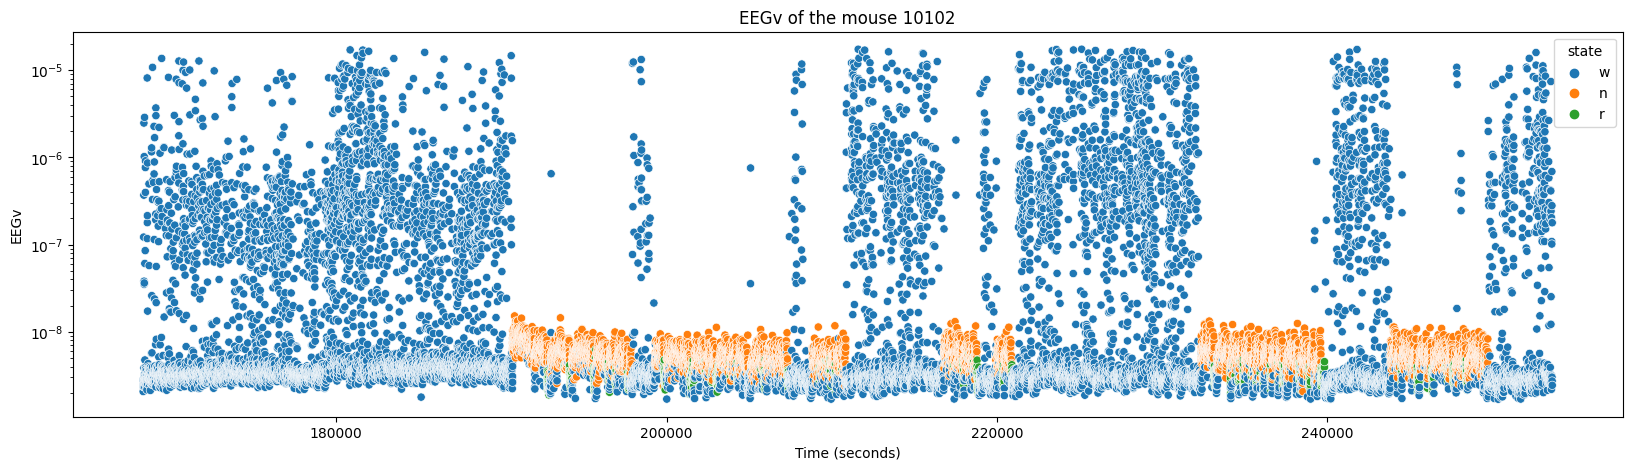

In [17]:

plt.figure(figsize=(20,5))
sns.scatterplot(x='seconds', y='EEGv', hue='state', data=df_day2)
plt.title('EEGv of the mouse ' + mouse)
plt.xlabel('Time (seconds)')
plt.ylabel('EEGv')
plt.yscale('log')
plt.show()

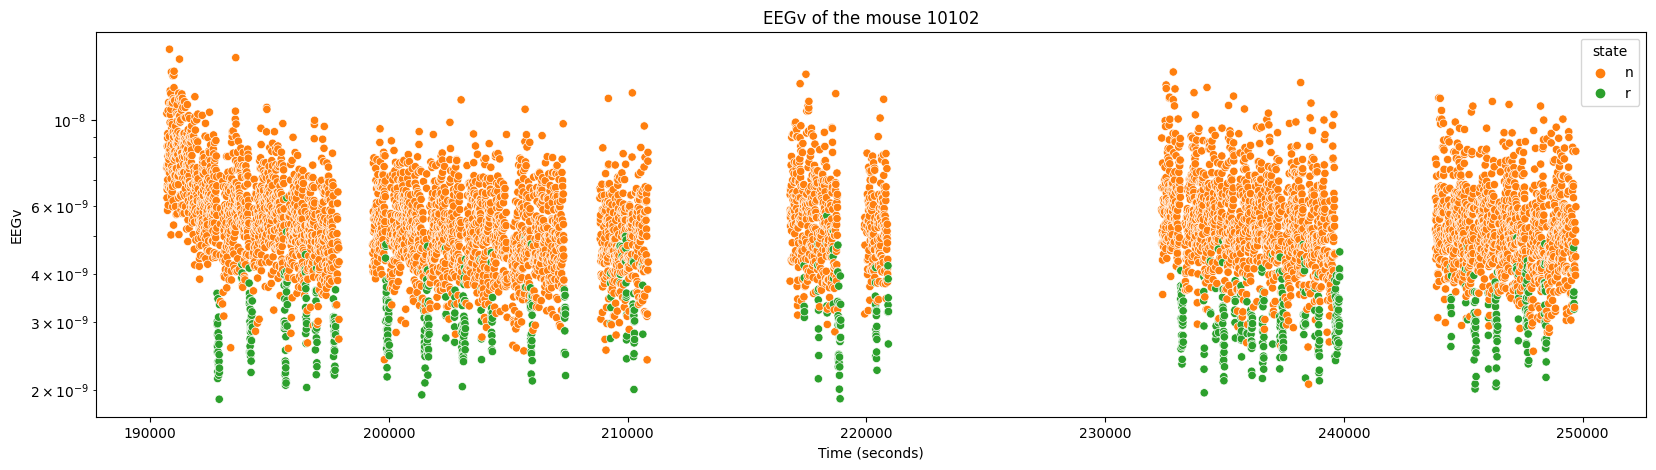

In [23]:
df_day2_sleep = df_day2[df_day2['state'] != 'w']
# plot REM in green and NREM in orange
palette = sns.color_palette()
orange = palette.as_hex()[1]
green = palette.as_hex()[2]
plt.figure(figsize=(20,5))
sns.scatterplot(x='seconds', y='EEGv', hue='state', data=df_day2_sleep, palette = [orange, green] )
plt.title('EEGv of the mouse ' + mouse)

plt.xlabel('Time (seconds)')
plt.ylabel('EEGv')

plt.yscale('log')

plt.show()

/tmp/ipykernel_963528/1970364737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['state'] = df7['state'].replace(['n', 'r'], [0, 1])


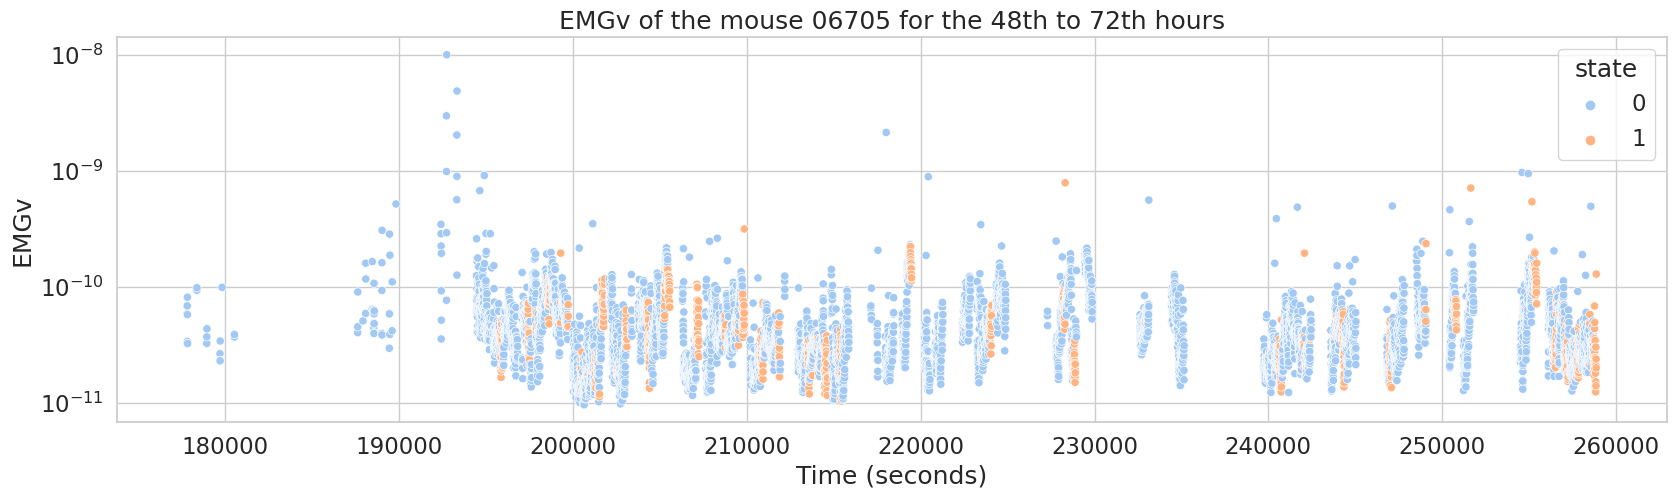

In [45]:

df6 = df[(df['hours'] >= 48) & (df['hours'] < 72)]
df7 = df6[df6['state'] != 'w']
df7['state'] = df7['state'].replace(['n', 'r'], [0, 1])
plt.figure(figsize=(20,5))
sns.scatterplot(x='seconds', y='EMGv', hue='state', data=df7)
plt.title('EMGv of the mouse ' + mouse + ' for the 48th to 72th hours')
plt.xlabel('Time (seconds)')
plt.ylabel('EMGv')
plt.yscale('log')
plt.show()


Representation of the EEG variance during the third day

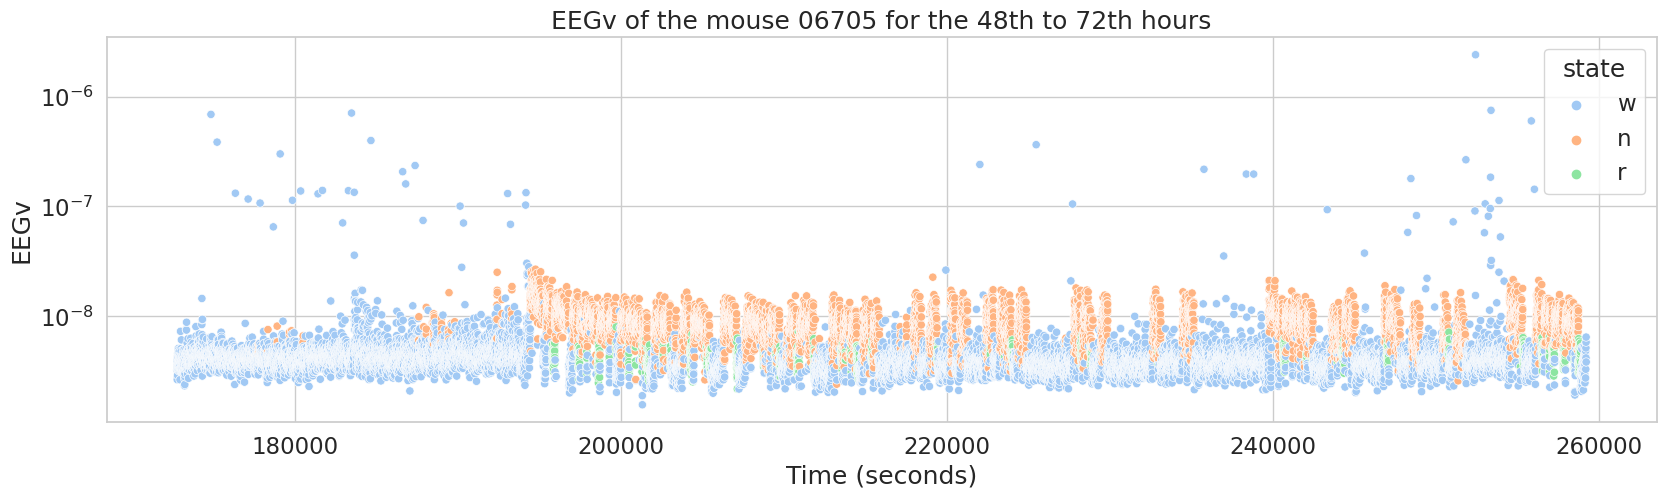

In [46]:
df6 = df[(df['hours'] >= 48) & (df['hours'] < 72)]
plt.figure(figsize=(20,5))
sns.scatterplot(x='seconds', y='EEGv', hue='state', data=df6)
plt.title('EEGv of the mouse ' + mouse + ' for the 48th to 72th hours')
plt.xlabel('Time (seconds)')
plt.ylabel('EEGv')
plt.yscale('log')
plt.show()

/tmp/ipykernel_963528/895517407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['state'] = df7['state'].replace(['n', 'r'], [0, 1])


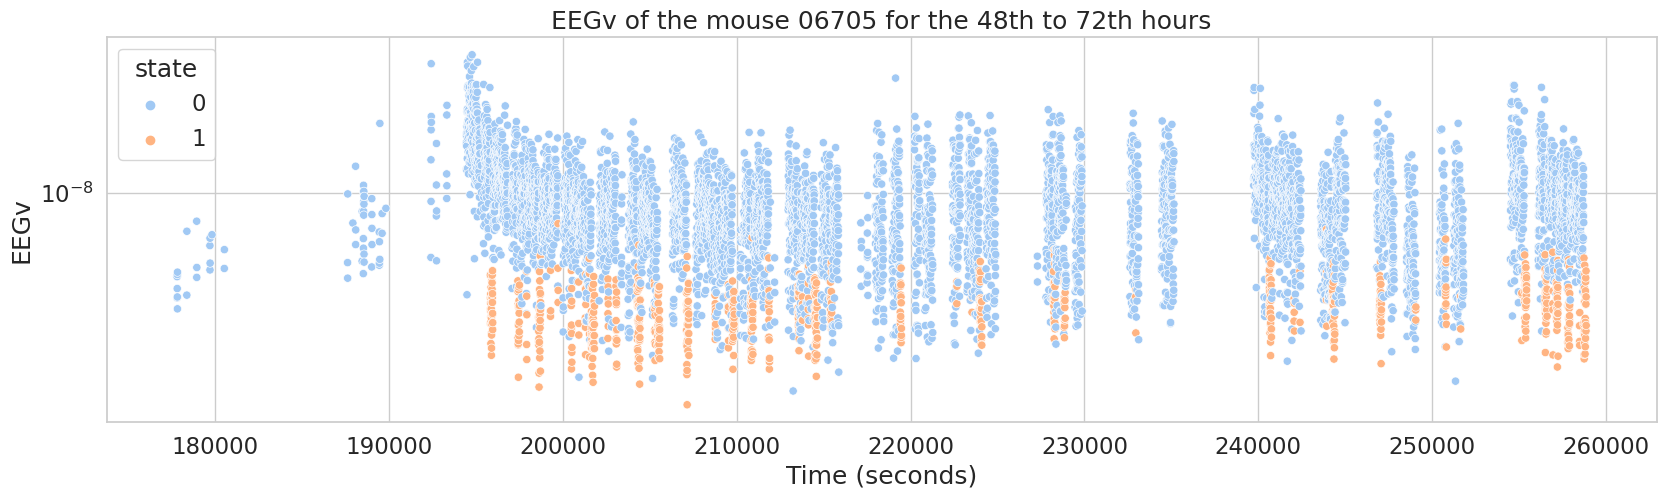

In [47]:

df6 = df[(df['hours'] >= 48) & (df['hours'] < 72)]
df7 = df6[df6['state'] != 'w']
df7['state'] = df7['state'].replace(['n', 'r'], [0, 1])
plt.figure(figsize=(20,5))
sns.scatterplot(x='seconds', y='EEGv', hue='state', data=df7)
plt.title('EEGv of the mouse ' + mouse + ' for the 48th to 72th hours')
plt.xlabel('Time (seconds)')
plt.ylabel('EEGv')
plt.yscale('log')
plt.show()


Visualisation of the sleep state during the third day

In [ ]:
df6 = df[(df['hours'] >= 48) & (df['hours'] < 72)]
# draw hypnogram of the third day
plt.figure(figsize=(20,5))

plt.plot(df6['seconds'], df6['state'])
plt.title('Hypnogram of the mouse ' + mouse + ' for the 48th to 72th hours')
plt.xlabel('Time (seconds)')
plt.ylabel('State')
plt.show()